<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [2]:
list_drop = ['ID','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [3]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [4]:
df_palas = df[df.unit == 'Pala']

In [5]:
df_palas.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'start', 'crew', 'eqmtid',
       'logintime', 'locid', 'operid', 'totaltime', 'pit', 'unit',
       'totalloads', 'totaltons', 'loadtime', 'idletime', 'spottime',
       'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03', 'tmcat04',
       'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [6]:
df_palas.head()

,shiftdate,shiftindex,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
44,2019-07-01,36157,2,28800,G2,307,0,TX210039,mmsunk,3088,MINA,Pala,3,690,0,0,0,3,3088,0,0,3088,0,0,0,0
45,2019-07-01,36157,2,28800,G2,307,3088,TX210039,07641,39893,MINA,Pala,100,23335,22347,5090,7656,100,39893,35320,0,2801,0,0,1772,0
46,2019-07-01,36157,2,28800,G2,307,42981,TX210039,mmsunk,219,MINA,Pala,0,0,0,0,0,0,219,0,0,219,0,0,0,0
47,2019-07-01,36157,2,28800,G2,BUZON,0,,mmsunk,43200,MINA,Pala,0,0,0,0,0,0,43200,0,0,0,43200,0,0,0
48,2019-07-01,36157,2,28800,G2,COSE2,0,,mmsunk,43200,,Pala,0,0,0,0,0,0,43200,0,0,0,43200,0,0,0


Ejemplo

In [ ]:
aux = df_palas[['shiftdate','shift#','eqmtid','totaltime','loadcnt','totaltons','tmcat01','tmcat02','tmcat03','tmcat04','tmcat05','tmcat06','tmcat07']]
aux[(df_palas.shiftdate == '2019-11-01') & (df_palas['shift#'] == '1') ]

In [12]:
palas = pd.DataFrame(df_palas.groupby(['shiftdate','shiftindex','shift#','eqmtid']).sum().reset_index().sort_values('shiftdate'))

In [13]:
palas.columns

Index(['shiftdate', 'shiftindex', 'shift#', 'eqmtid', 'start', 'logintime',
       'totaltime', 'totalloads', 'totaltons', 'loadtime', 'idletime',
       'spottime', 'loadcnt', 'tmcat00', 'tmcat01', 'tmcat02', 'tmcat03',
       'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07'],
      dtype='object')

In [14]:
list_drop = ['start','logintime','totalloads','loadtime','idletime','spottime','tmcat00']
palas.drop(list_drop,axis=1,inplace=True)

In [15]:
palas.head(10)

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
0,2019-07-01,36156,1,025,43200,0,0,0,0,0,0,3600,39600,0
20,2019-07-01,36157,2,029,43200,0,0,34200,0,1800,0,0,7200,0
21,2019-07-01,36157,2,030,43200,0,0,27000,0,9000,0,0,7200,0
22,2019-07-01,36157,2,210,43200,0,0,0,0,0,0,43200,0,0
23,2019-07-01,36157,2,211,43200,35782,157,35168,0,814,3086,0,4132,0
24,2019-07-01,36157,2,212,43200,0,0,0,0,0,0,43200,0,0
25,2019-07-01,36157,2,213,43200,2833,12,5593,0,367,3466,33774,0,0
27,2019-07-01,36157,2,305,43200,12764,55,30875,0,3972,4192,0,4161,0
28,2019-07-01,36157,2,306,43200,12139,54,24996,0,10339,0,6049,1816,0
29,2019-07-01,36157,2,307,43200,24025,103,35320,0,6108,0,0,1772,0


In [16]:
aux = palas[['shiftdate','shift#','eqmtid','totaltime','loadcnt','totaltons','tmcat01','tmcat02','tmcat03','tmcat04','tmcat05','tmcat06','tmcat07']]
aux[(palas.shiftdate == '2019-11-01') & (palas['shift#'] == '1') ]

,shiftdate,shift#,eqmtid,totaltime,loadcnt,totaltons,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
4408,2019-11-01,1,TAMA2,43200,0,0,0,0,0,43200,0,0,0
4409,2019-11-01,1,VALLE2,43200,0,0,0,0,0,43200,0,0,0
4393,2019-11-01,1,026,43200,0,0,0,0,0,43200,0,0,0
4394,2019-11-01,1,029,43200,0,0,0,0,0,43200,0,0,0
4395,2019-11-01,1,030,43200,0,0,0,0,0,0,0,43200,0
4396,2019-11-01,1,210,43200,0,0,0,0,0,0,0,0,43200
4397,2019-11-01,1,211,43200,161,36983,35058,0,4443,0,0,3699,0
4398,2019-11-01,1,212,43200,0,0,0,0,0,0,43200,0,0
4399,2019-11-01,1,213,43200,0,0,0,0,0,0,43200,0,0
4392,2019-11-01,1,025,43200,0,0,0,0,43200,0,0,0,0


Calculo Rendimiento

In [17]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    return int((ton/time) * 3600)

In [18]:
palas['rendimiento_efectivo'] = palas.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

Datos anomalos

In [19]:
palas[palas.rendimiento_efectivo > 1.5 * 3600]

,shiftdate,shiftindex,shift#,eqmtid,totaltime,totaltons,loadcnt,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
7406,2020-01-26,36574,1,307,43200,15268,64,2660,0,21656,18884,0,0,0,20663
7543,2020-01-30,36582,1,BUZON,43200,3698,16,2092,0,0,41108,0,0,0,6363
10470,2020-05-09,36783,2,211,43200,240,1,20,0,66,0,42478,636,0,43200


In [20]:
palas.drop([7406,7543,10470],axis=0,inplace=True)

Eliminamos las Palas con toneladas y timepo efectivos iguales a 0

In [21]:
palas = palas[(palas.totaltons != 0) & (palas.tmcat01 != 0)]

In [22]:
palas.drop(['totaltons','tmcat01'],axis=1,inplace=True)

La fecha la convertimos en un valor númerico

In [23]:
import datetime as dt

In [24]:
palas['shiftdate'] = pd.to_datetime(palas['shiftdate'])
palas['shiftdate'] = palas['shiftdate'].map(dt.datetime.toordinal)

(?) Que fechas nos quedamos

In [25]:
palas.drop('shiftindex',axis=1,inplace=True)
#palas.drop('shiftdate',axis=1,inplace=True)

In [26]:
palas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 23 to 13629
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   shiftdate             3812 non-null   int64 
 1   shift#                3812 non-null   object
 2   eqmtid                3812 non-null   object
 3   totaltime             3812 non-null   int64 
 4   loadcnt               3812 non-null   int64 
 5   tmcat02               3812 non-null   int64 
 6   tmcat03               3812 non-null   int64 
 7   tmcat04               3812 non-null   int64 
 8   tmcat05               3812 non-null   int64 
 9   tmcat06               3812 non-null   int64 
 10  tmcat07               3812 non-null   int64 
 11  rendimiento_efectivo  3812 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 387.2+ KB


In [27]:
palas.describe()

,shiftdate,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
count,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000
mean,737448.412644,43188.600472,70.815058,2.518888,2677.501049,5097.592602,5406.289874,2742.799580,1064.181532,2202.463799
std,132.293054,314.593880,43.250154,141.719613,2472.655039,9118.863231,9344.629754,3029.974779,4922.852505,923.536280
min,737241.000000,34509.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,737330.000000,43200.000000,35.000000,0.000000,978.500000,0.000000,0.000000,0.000000,0.000000,1596.750000
50%,737442.000000,43200.000000,69.000000,0.000000,2159.500000,0.000000,0.000000,3571.000000,0.000000,2113.000000
75%,737569.000000,43200.000000,99.000000,0.000000,3635.500000,6073.750000,7347.500000,3593.000000,0.000000,2900.250000
max,737676.000000,43200.000000,232.000000,8704.000000,27313.000000,41994.000000,42483.000000,34999.000000,41243.000000,4914.000000


#Funciones

In [28]:
def plot_matriz(y_test,y_pred):
  cf_matrix = confusion_matrix(y_test,y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  class_names = [0,1]
  # settings plot
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Matriz de Confusión', y=1.1)
  # plot
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))

In [29]:
def tree_to_png(dtree,df,name):
  dot_data = StringIO()
  export_graphviz(dtree,
                  feature_names=df.drop('rend_ef_bin',axis=1).columns,
                  class_names=['Malo','Bueno'],
                  filled = True,
                  out_file=dot_data)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png(name)
  Image(graph.create_png())

In [30]:
from sklearn.tree._tree import TREE_LEAF

In [31]:
def podar(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        podar(inner_tree, inner_tree.children_left[index], threshold)
        podar(inner_tree, inner_tree.children_right[index], threshold)

In [132]:
def codo(K,data):
  sum_of_squared_distances = []
  for k in range(1,K):
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

  plt.plot(range(1,K),sum_of_squared_distances)
  plt.show()

#Regresión lineal

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
palas.columns

Index(['shiftdate', 'shift#', 'eqmtid', 'totaltime', 'loadcnt', 'tmcat02',
       'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo'],
      dtype='object')

In [34]:
target = "rendimiento_efectivo"
list_drop = [target,'shiftdate','shift#','eqmtid']
X = palas.drop(list_drop,axis=1)
y = palas[target]

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 23 to 13629
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   totaltime  3812 non-null   int64
 1   loadcnt    3812 non-null   int64
 2   tmcat02    3812 non-null   int64
 3   tmcat03    3812 non-null   int64
 4   tmcat04    3812 non-null   int64
 5   tmcat05    3812 non-null   int64
 6   tmcat06    3812 non-null   int64
 7   tmcat07    3812 non-null   int64
dtypes: int64(8)
memory usage: 268.0 KB


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn import linear_model

In [40]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = modelo.predict(X_test)
pd.DataFrame(modelo.coef_,X.columns,columns=['Coefficient'])

,Coefficient
totaltime,-621.099572
loadcnt,5922.096092
tmcat02,652.427993
tmcat03,1704.240703
tmcat04,2087.860718
tmcat05,3017.599949
tmcat06,1881.710609
tmcat07,2781.404244


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


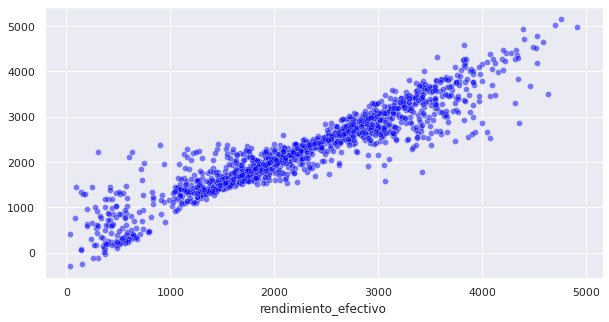

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,y_pred,color='blue',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


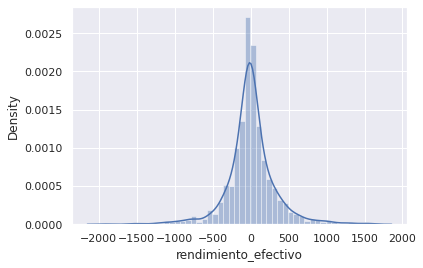

In [43]:
sns.distplot((y_test-y_pred),bins=50)

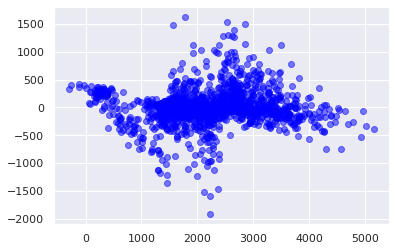

In [44]:
plt.scatter(y_pred,y_test-y_pred,c='blue',alpha=0.5)

In [45]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8796767987682894

- **MAE** es el más simple de entender, es el error promedio
- **MSE** es más popular y útil en el mundo real porque castiga grandes errores.
- **RMSE** es el mas popular porque el error puede ser interpretado en unidades de "Y"

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 209.70506888054175
MSE: 106228.85317902507
RMSE: 325.92768090333334


In [47]:
import numpy as np

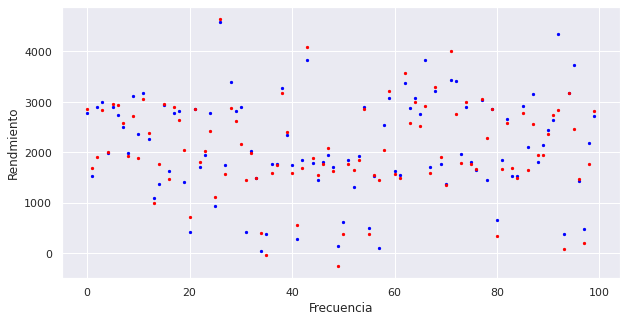

In [51]:
test_index = [i for i in range(len(y_test))]
pred_index = [i for i in range(len(y_pred))]

plt.figure(figsize=(10,5))
plt.scatter(test_index[:100],y_test[:100],color='blue',s=5)
plt.scatter(pred_index[:100],y_pred[:100],color='red',s=5)

plt.xlabel("Frecuencia")
plt.ylabel("Rendmiento")
plt.show()

#Regresión logística

In [55]:
palas['rendimiento_efectivo'].describe()

count    3812.000000
mean     2202.463799
std       923.536280
min        24.000000
25%      1596.750000
50%      2113.000000
75%      2900.250000
max      4914.000000
Name: rendimiento_efectivo, dtype: float64

Diferenciamos Bueno o Malo segun el promedio de rendimiento

In [56]:
def check(valor):
  #if valor >= 0.615921: tons / seg
  if valor >= 2202.463799: # tons / hora
    return 1
  else:
    return 0

Columna binaria

In [57]:
palas['rend_ef_bin'] = palas.apply(lambda row : check(row.rendimiento_efectivo),axis=1)

In [58]:
pd.DataFrame(palas.groupby(['rend_ef_bin']).count())

,shiftdate,shift#,eqmtid,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo
rend_ef_bin,,,,,,,,,,,,
0,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
1,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777


Dummy's

In [59]:
turno = pd.get_dummies(palas['shift#'])

In [60]:
eqmtid = pd.get_dummies(palas['eqmtid'])

In [61]:
train = pd.concat([palas.drop(['shift#','eqmtid','rendimiento_efectivo'],axis=1),turno,eqmtid],axis=1)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 23 to 13629
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   shiftdate    3812 non-null   int64
 1   totaltime    3812 non-null   int64
 2   loadcnt      3812 non-null   int64
 3   tmcat02      3812 non-null   int64
 4   tmcat03      3812 non-null   int64
 5   tmcat04      3812 non-null   int64
 6   tmcat05      3812 non-null   int64
 7   tmcat06      3812 non-null   int64
 8   tmcat07      3812 non-null   int64
 9   rend_ef_bin  3812 non-null   int64
 10  1            3812 non-null   uint8
 11  2            3812 non-null   uint8
 12  026          3812 non-null   uint8
 13  029          3812 non-null   uint8
 14  030          3812 non-null   uint8
 15  210          3812 non-null   uint8
 16  211          3812 non-null   uint8
 17  212          3812 non-null   uint8
 18  213          3812 non-null   uint8
 19  305          3812 non-null   uint8
 20  306   

In [63]:
train.head(10)

,shiftdate,totaltime,loadcnt,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rend_ef_bin,1,2,026,029,030,210,211,212,213,305,306,307,BUZON
23,737241,43200,157,0,814,3086,0,4132,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
25,737241,43200,12,0,367,3466,33774,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
27,737241,43200,55,0,3972,4192,0,4161,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
28,737241,43200,54,0,10339,0,6049,1816,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
29,737241,43200,103,0,6108,0,0,1772,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
6,737241,43200,60,0,4935,0,0,1787,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,737241,43200,161,0,4166,0,0,3556,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
5,737241,43200,128,0,3981,0,0,3524,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
10,737241,43200,33,0,8632,13462,0,1778,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,737241,43200,21,0,6173,15863,0,3627,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [172]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('rend_ef_bin',axis=1),
                                                    train['rend_ef_bin'],
                                                    test_size=0.30,random_state=42)

In [173]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
y_pred = log_reg.predict(X_test)

In [177]:
from sklearn.metrics import classification_report

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       609
           1       0.91      0.88      0.89       535

    accuracy                           0.90      1144
   macro avg       0.90      0.90      0.90      1144
weighted avg       0.90      0.90      0.90      1144



In [179]:
from sklearn.metrics import confusion_matrix

In [180]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[563,  46],
       [ 66, 469]])

In [181]:
import numpy as np

Accuracy: 0.9020979020979021
Precision: 0.9106796116504854
Recall: 0.8766355140186916


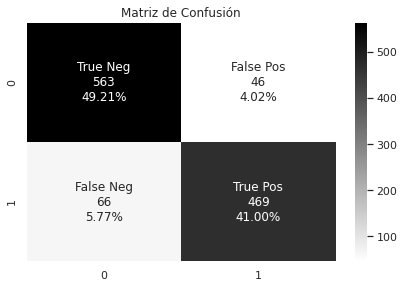

In [182]:
plot_matriz(y_test,y_pred)

In [ ]:
log_reg.coef_

array([[-1.75292496e-05,  2.83393102e-04,  3.20044712e-03,
         4.87266496e-04,  1.52021718e-05, -7.81136500e-05,
         3.58672899e-05,  1.39863746e-04, -9.54617581e-06,
         1.47723320e-06, -1.47614278e-06, -4.36004286e-07,
        -3.06769170e-07, -6.25522185e-08,  8.07876404e-06,
         1.86783291e-05,  8.31596813e-06,  1.52593258e-05,
        -1.72983555e-05, -1.22820786e-05, -1.38256839e-05,
        -6.11985291e-06]])

#Árbol de decisión

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
modelo = DecisionTreeClassifier()

In [185]:
modelo.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [186]:
y_pred = modelo.predict(X_test)

In [187]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

In [188]:
tree_to_png(modelo,train,'/content/tree.png')

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       609
           1       0.89      0.90      0.89       535

    accuracy                           0.90      1144
   macro avg       0.90      0.90      0.90      1144
weighted avg       0.90      0.90      0.90      1144



In [190]:
confusion_matrix(y_test,y_pred)

array([[549,  60],
       [ 56, 479]])

Accuracy: 0.8986013986013986
Precision: 0.8886827458256029
Recall: 0.8953271028037383


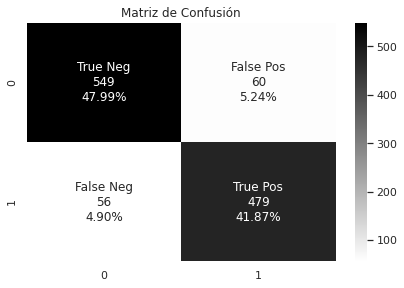

In [191]:
plot_matriz(y_test,y_pred)

Podar -> Restringir directamente el valor más bajo (número de ocurrencias de una clase particular), todos los hijos de los nodos con un conteo mínimo de clases menor que 5

In [192]:
print(sum(modelo.tree_.children_left < 0))
# start pruning from the root
podar(modelo.tree_, 0, 5)
sum(modelo.tree_.children_left < 0)

186


232

In [193]:
tree_to_png(modelo,train,'/content/tree_pod.png')

#Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
modelo = RandomForestClassifier(n_estimators=100)

In [196]:
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
y_pred = modelo.predict(X_test)

In [198]:
len(modelo.estimators_)

100

Imprimir 5 primeros arboles

In [204]:
for index in range(0, 5):
  name = '/content/tree_rf_' + str(index) + '.png'
  tree_to_png(modelo.estimators_[index],train,name)

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       609
           1       0.91      0.91      0.91       535

    accuracy                           0.92      1144
   macro avg       0.92      0.92      0.92      1144
weighted avg       0.92      0.92      0.92      1144



In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_test,y_pred)

array([[559,  50],
       [ 52, 483]])

Accuracy: 0.9108391608391608
Precision: 0.9061913696060038
Recall: 0.902803738317757


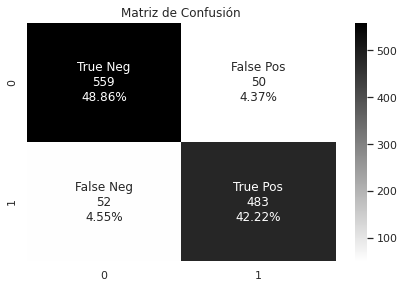

In [117]:
plot_matriz(y_test,y_pred)

#AdaBoost

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [119]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [120]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [121]:
clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([0])

In [122]:
clf.score(X_test, y_test)

0.9274475524475524

#KNN

In [160]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('rend_ef_bin',axis=1),
                                                    train['rend_ef_bin'],
                                                    test_size=0.30,random_state=42)

In [161]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn = KNeighborsClassifier(n_neighbors=1)

In [164]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [165]:
pred = knn.predict(X_test)

In [166]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       609
           1       0.86      0.86      0.86       535

    accuracy                           0.87      1144
   macro avg       0.87      0.87      0.87      1144
weighted avg       0.87      0.87      0.87      1144



In [167]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

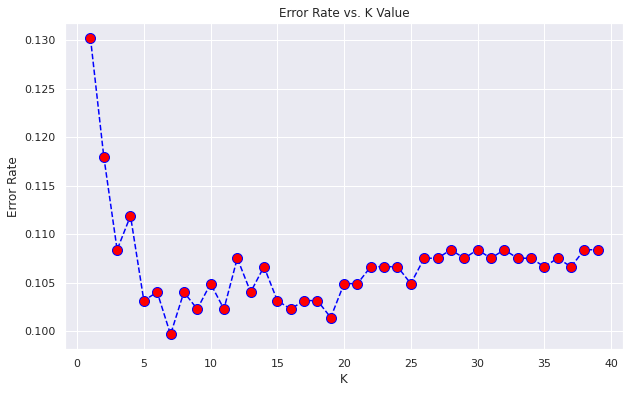

In [168]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [201]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Con K=7')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Con K=7
[[554  55]
 [ 59 476]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       609
           1       0.90      0.89      0.89       535

    accuracy                           0.90      1144
   macro avg       0.90      0.90      0.90      1144
weighted avg       0.90      0.90      0.90      1144



#Kmeans

In [159]:
palas.columns

Index(['shiftdate', 'shift#', 'eqmtid', 'totaltime', 'loadcnt', 'tmcat02',
       'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo', 'rend_ef_bin'],
      dtype='object')

In [158]:
from sklearn.cluster import KMeans

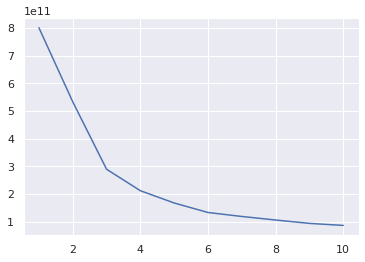

In [210]:
codo(11,train.drop('rend_ef_bin',axis=1))